# In-vivo evidence for increased tau deposition in temporal lobe epilepsy

### Content
1. Participants
1.  *Figure 3:* Relationship to clinical and cognitive variables

# **Figure 3:** Relationship to clinical and cognitive variables


In [1]:
# Libraries
import numpy as np
import pandas as pd 

# Load utilities functions from utils.py
from utils import *

### Fetch data

In [2]:
osf_path="/Users/rcruces/Desktop/OSF_data_revision-2025"

# Load the data frame
#osf_df = osf_download("18F-MK6240_in-vivo_database.csv", project_id='ct3gw')
#df = pd.read_csv(osf_df)
df = pd.read_csv(f"{osf_path}/18F-MK6240_in-vivo_database_osf.csv")

# Load processed 18F-MK6240 PET data | matrix:{vertices x subjects}
#osf_pet_raw = osf_download("surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy", project_id='ct3gw')
#pet_raw = np.load(osf_pet_raw)
pet_raw = np.load(f"{osf_path}/surf-fsLR-32k_desc-GroupData_smooth-10mm_pvc-probGM_ref-cerebellarGM_trc-18Fmk6240_pet.npy")


### Sort the matrices into ipsilateral/contralateral relative to seizure focus

In [3]:
# fsLR-32k length
n_64k = pet_raw.shape[1]
n_32k = int(n_64k/2)

# Flip R >> L 18F-mk6240
mk_ipsi, mk_contra = flip_mat(pet_raw[:,0:n_32k], pet_raw[:,n_32k:n_64k], df['lateralization'].values, flip='R')

# Merge ipsi and contra
tauMK6240 = np.concatenate((mk_ipsi, mk_contra), axis=1)


Flipping data from Right to Left


-----------------

### A | Tau MK6240 SUVR and clinical relationships

### Effect of age

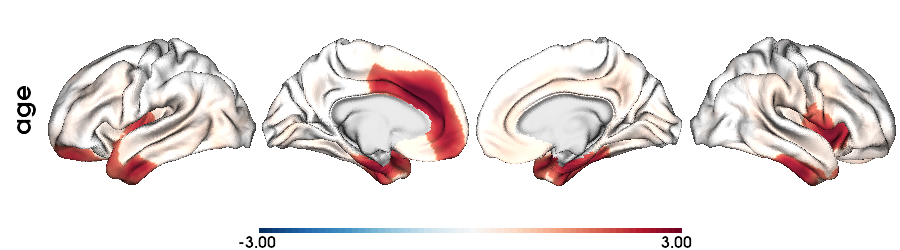

In [4]:
slm_surf(df, tauMK6240, feat='age', neg_tail=False, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Effect of duration

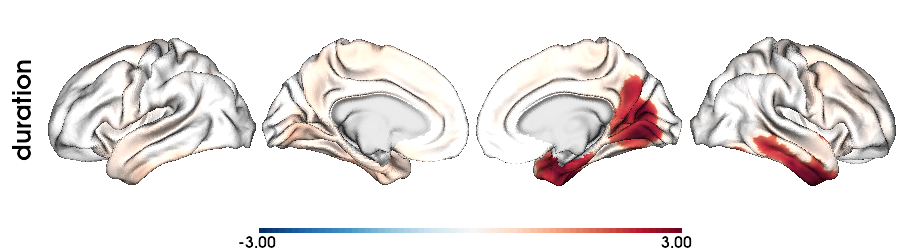

In [5]:
# Slice only Patients
idx = df['group'] == 'Patient'

slm_surf(df[idx], tauMK6240[idx,:], feat='duration', neg_tail=False, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Effect of onset

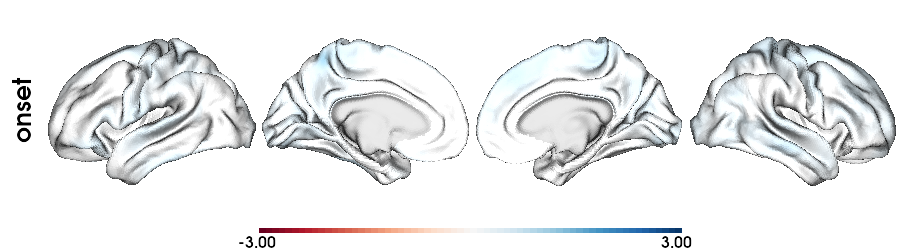

In [13]:
# Create variable onset
df['onset'] = df['age'] - df['duration']

# Slice only the Patients
idx = df['group'] == 'Patient'

slm_surf(df[idx], tauMK6240[idx,:], feat='onset', neg_tail=True, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### B | Tau MK6240 SUVR and behavioral relationships

### Epitrack score

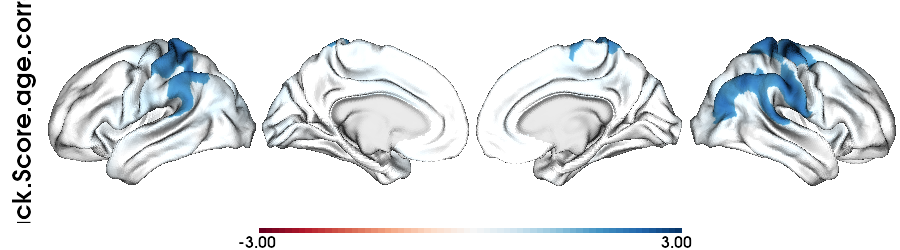

In [7]:
slm_surf(df, feat='EpiTrack.Score.age.corrected', Y=tauMK6240, neg_tail=True, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Episodic memory

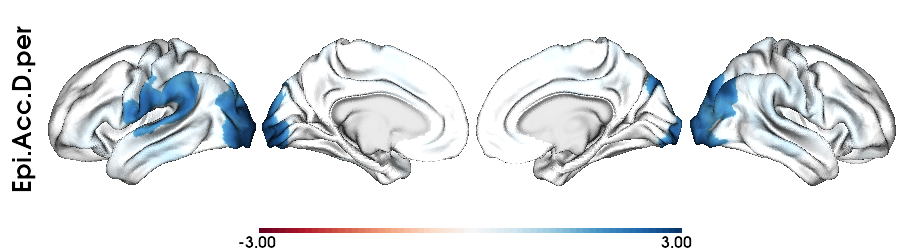

In [8]:
slm_surf(df, feat='Epi.Acc.D.per', Y=tauMK6240, neg_tail=True, cthr=0.05, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Semantic memory

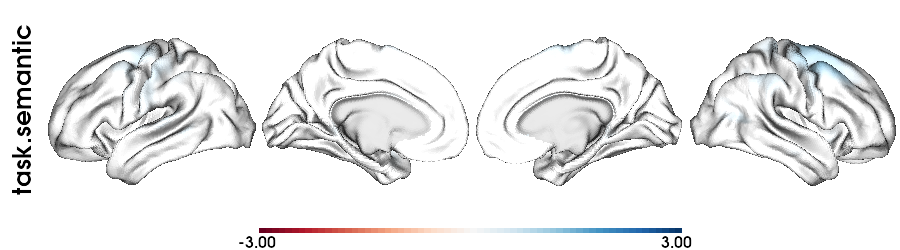

In [9]:
slm_surf(df, feat='task.semantic', Y=tauMK6240, neg_tail=True, cthr=0.05, alpha=0.5, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Memory retrieval

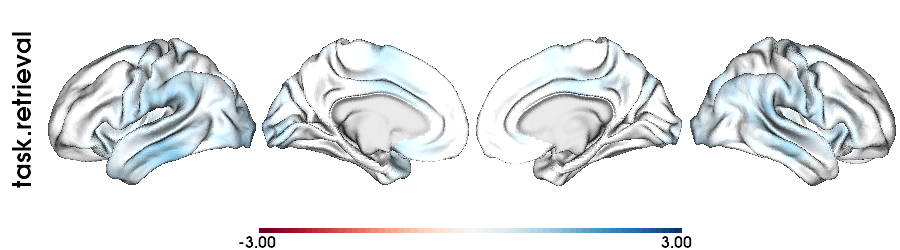

In [10]:
slm_surf(df, feat='task.retrieval', Y=tauMK6240, neg_tail=True, cthr=0.05, alpha=0.5, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Spatial task

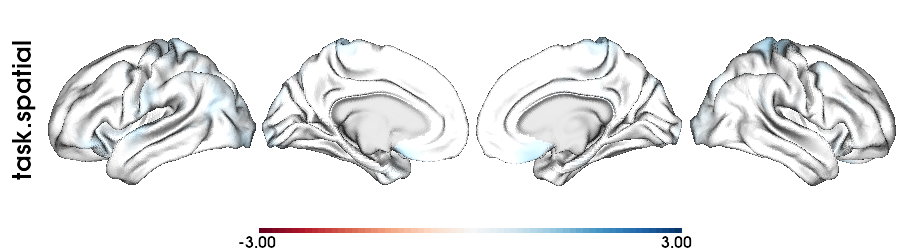

In [11]:
slm_surf(df, feat='task.spatial', Y=tauMK6240, neg_tail=True, cthr=0.05, alpha=0.5, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

### Effect of duration controlled for age

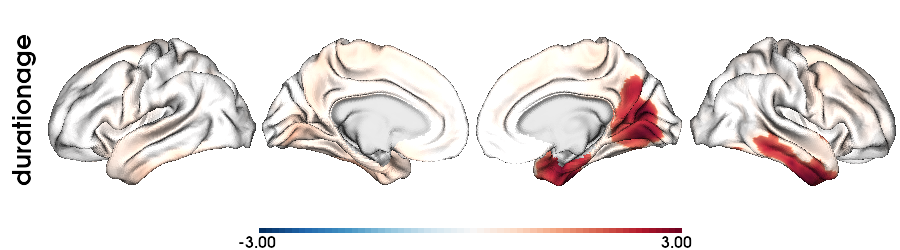

In [12]:
from sklearn.linear_model import LinearRegression

# Subset the dataframe for the relevant index
sub_df = df.loc[idx, ['age', 'duration']]

# Drop rows with any NA values in these columns
sub_df = sub_df.dropna()

# Extract X and y
X = sub_df[['age']]  # 2D array
y = sub_df['duration']

# Create linear regression object
mod = LinearRegression()

# Fit the model
mod.fit(X, y)

# Generate predicted values
predic = mod.predict(X)

# Compute residuals
df.loc[sub_df.index, 'durationage'] = y - predic

# Apply slm_surf
slm_surf(df.loc[sub_df.index], tauMK6240[sub_df.index, :], 
         feat='durationage', neg_tail=False, cthr=0.05, scale=1, 
         nan_color=(0.8, 0.8, 0.8, 1))


-----------------

# Supplementary Figure: Relationships with hippocampal volume

## A | Tau MK6240 SUVR and **Ipsilateral** Hippocampal volume

In [ ]:
slm_surf(df, feat='hip.ipsi', Y=tauMK6240, neg_tail=True, cthr=0.05, alpha=0.6, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

In [ ]:
slm_surf(df, feat='hip.ipsi', Y=tauMK6240, neg_tail=False, cthr=0.05, alpha=0.6, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

## B | Tau MK6240 SUVR and **Contralatera** Hippocampal volume

In [ ]:
slm_surf(df, feat='hip.cntr', Y=tauMK6240, neg_tail=True, cthr=0.05, alpha=0.6, scale=1, nan_color=(0.8, 0.8, 0.8, 1))

In [ ]:
slm_surf(df, feat='hip.cntr', Y=tauMK6240, neg_tail=True, cthr=0.05, alpha=0.6, scale=1, nan_color=(0.8, 0.8, 0.8, 1))